In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

from IPython.display import clear_output

In [64]:
regions = ['île-de-france','auvergne-rhône-alpes','pays de la loire',
    'occitanie','nouvelle-aquitaine','provence-alpes-côte d\'azur',
    'hauts-de-france','bretagne','grand est']

In [65]:
df = pd.read_csv('csv/jobs_it_process.csv')
df = df.dropna(subset=['salary_mean', 'region'])
df = pd.concat([df, pd.get_dummies(df['region'], prefix='region')], axis=1)
df = pd.concat([
df, pd.get_dummies(df.pop('salary_origin_mode'), prefix='mode')], axis=1).drop(['dep', 'date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 5 to 10351
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _id                                1532 non-null   object 
 1   query                              1532 non-null   object 
 2   title                              1532 non-null   object 
 3   company                            1532 non-null   object 
 4   rating_mean                        1532 non-null   float64
 5   location                           1532 non-null   object 
 6   salary                             1532 non-null   object 
 7   summary                            1532 non-null   object 
 8   sponso                             1532 non-null   int64  
 9   contract                           1279 non-null   object 
 10  desc                               1532 non-null   object 
 11  rating_count                       1532 non-null   int6

In [66]:
f_query=list(df.columns[16:20])
f_contract=list(df.columns[20:30])
f_region=list(df.columns[33:45])
f_mode=list(df.columns[45:])

In [67]:
f_select = f_contract + ['mode_an', 'rating_count', 'rating_mean']
len(f_select)

13

In [68]:
data = {}
sample = df
X_train, X_test, y_train, y_test = train_test_split(sample, sample['salary_mean'], test_size=.3, random_state=0)
data['full'] = {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}
for region in regions:
    sample = df[df['region'] == region]
    X_train, X_test, y_train, y_test = train_test_split(sample, sample['salary_mean'], test_size=.3, random_state=0)
    data[region] = {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}

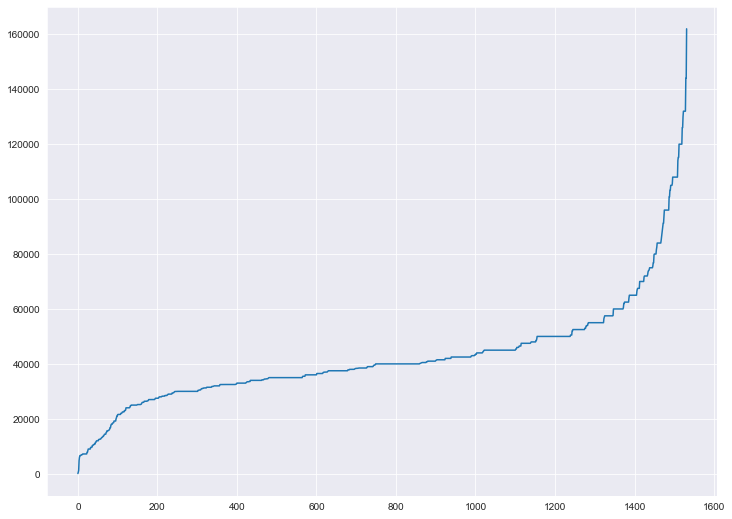

In [69]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(len(df)), df['salary_mean'].sort_values())

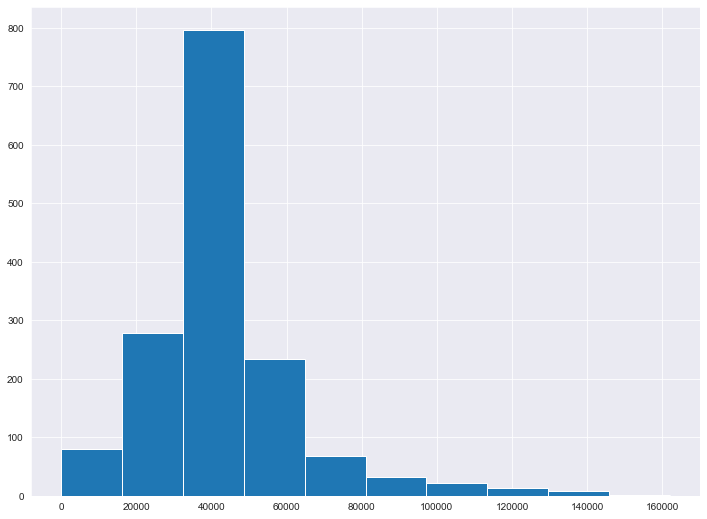

In [70]:
df['salary_mean'].hist(figsize=(12, 9))

In [71]:
df.sort_values(by='salary_mean')[['title', 'company', 'region', 'contract', 'salary', 'salary_mean']].head()

,title,company,region,contract,salary,salary_mean
2190,DATA ANALYST JUNIOR (STAGE),Garantme,île-de-france,Stage,6 € par mois,72.0
197,Stage Long - Data Scientist [STAGE],Mailoop,île-de-france,Stage,575 € par an,575.0
5101,Stage Webmarketing Planisware,Planisware,île-de-france,Stage,1 000 € - 1 500 € par an,1250.0
10052,Animateur/Développeur FLASH,IN-communication,provence-alpes-côte d'azur,Stage,400 € par mois,4800.0
9907,Stage Animation 3D et 360 – Startup – 2 à 6 mois,Objeos,provence-alpes-côte d'azur,"Temps plein, Stage",500 € par mois,6000.0


In [72]:
df.sort_values(by='salary_mean')[['title', 'company', 'region', 'contract', 'salary', 'salary_mean']].tail()

,title,company,region,contract,salary,salary_mean
3873,Data Scientist Python confirme / Freelance,INFOTEL CONSEIL,île-de-france,"Temps plein, Freelance / Indépendant",550 € par jour,132000.0
2387,Mission Freelance Paris - Développeur Ruby On ...,Upway,île-de-france,"Temps plein, Temps partiel, Freelance / Indépe...",400 € - 700 € par jour,132000.0
2195,Concepteur Développeur Confirmé WTX / Freelance,Celexio,île-de-france,"Temps plein, Freelance / Indépendant",600 € par jour,144000.0
2800,Développeur Front End (avec notions PHP) / Fre...,warren walter,île-de-france,"Temps plein, Freelance / Indépendant",600 € par jour,144000.0
57,Data Scientist confirm / Freelance,ABSIS CONSEIL,île-de-france,"Temps plein, Freelance / Indépendant",650 € - 700 € par jour,162000.0


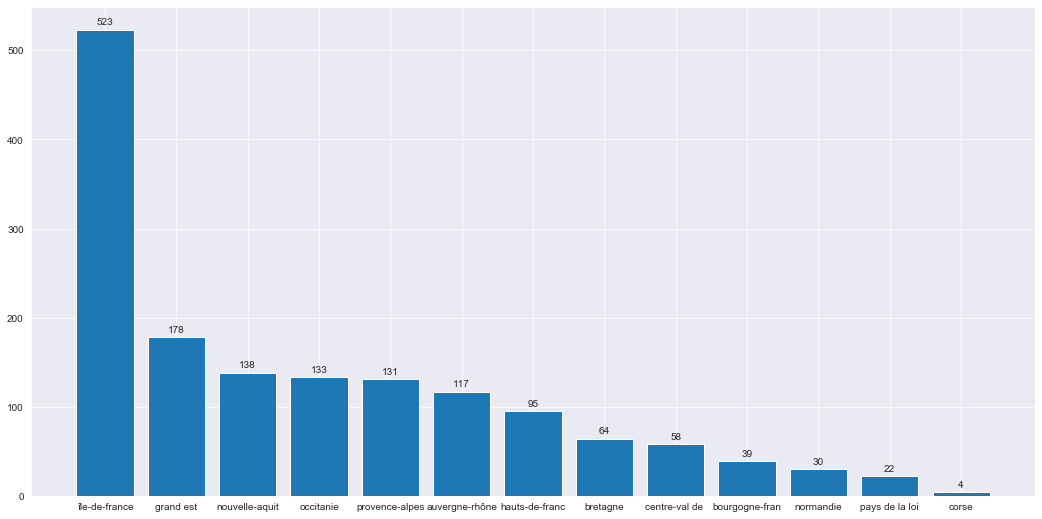

In [89]:
plt.figure(figsize=(18, 9))
rects = plt.bar([r[:14] for r in df['region'].unique()], df['region'].value_counts())
for i in range(len(rects)):
    height = rects[i].get_height()
    plt.annotate('{}'.format(height),
                xy=(rects[i].get_x() + rects[i].get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

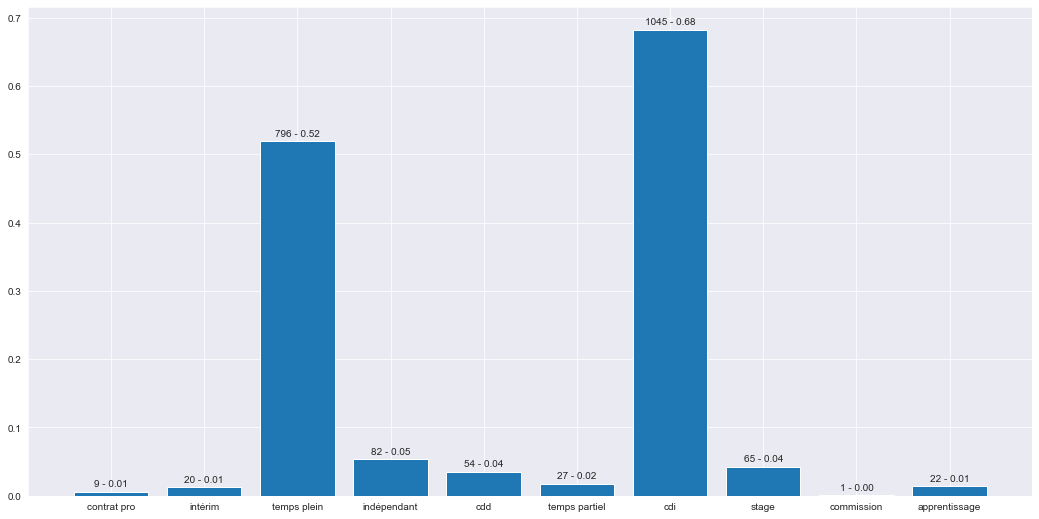

In [85]:
x = np.arange(len(f_contract))
m1 = np.array([np.round(df[contract].value_counts()[1], 2) for contract in f_contract])
plt.figure(figsize=(18, 9))
rects = plt.bar(x, m1 / len(df))
plt.xticks(x, [contract.split('_')[1] for contract in f_contract])
for i in range(len(m1)):
    height = rects[i].get_height()
    plt.annotate('{} - {:.2f}'.format(m1[i], height),
                xy=(rects[i].get_x() + rects[i].get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

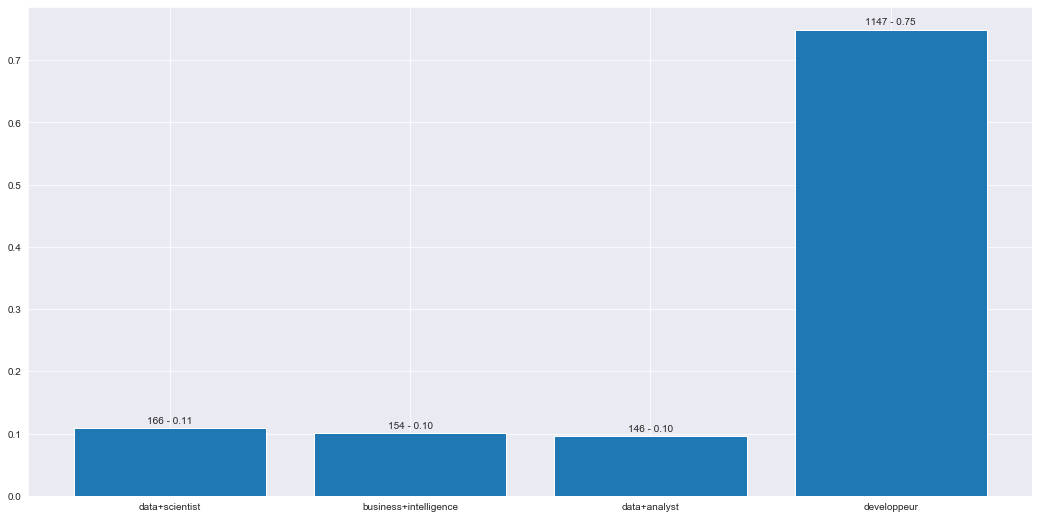

In [86]:
x = np.arange(len(f_query))
m1 = np.array([np.round(df[query].value_counts()[1], 2) for query in f_query])
plt.figure(figsize=(18, 9))
rects = plt.bar(x, m1 / len(df))
plt.xticks(x, [query.split('_')[1] for query in f_query])
for i in range(len(m1)):
    height = rects[i].get_height()
    plt.annotate('{} - {:.2f}'.format(m1[i], height),
                xy=(rects[i].get_x() + rects[i].get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

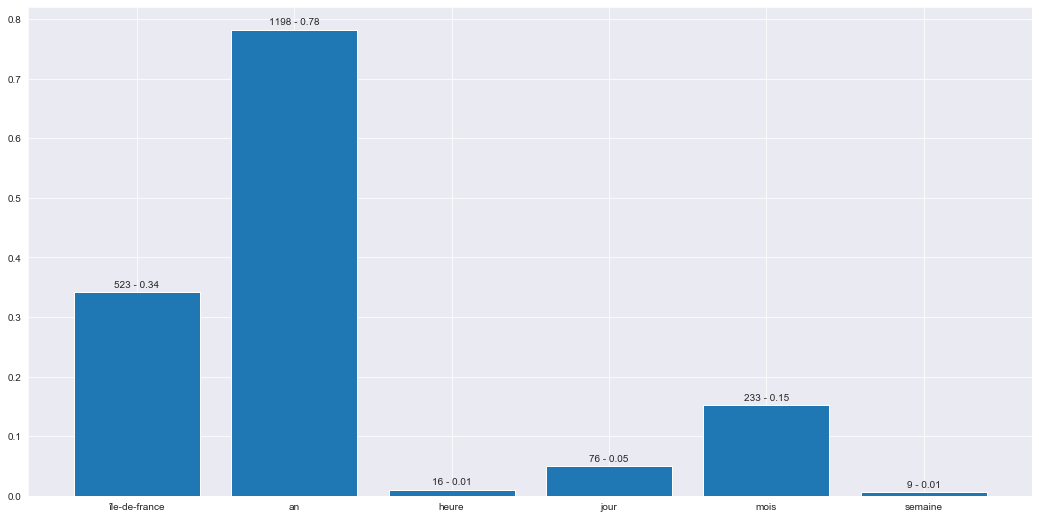

In [87]:
x = np.arange(len(f_mode))
m1 = np.array([np.round(df[mode].value_counts()[1], 2) for mode in f_mode])
plt.figure(figsize=(18, 9))
rects = plt.bar(x, m1 / len(df))
plt.xticks(x, [mode.split('_')[1] for mode in f_mode])
for i in range(len(m1)):
    height = rects[i].get_height()
    plt.annotate('{} - {:.2f}'.format(m1[i], height),
                xy=(rects[i].get_x() + rects[i].get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

In [9]:
def get_splits(region):
    return data[region]['X_train'], data[region]['X_test'], data[region]['y_train'], data[region]['y_test']

# Tuning

## Functions

In [9]:
REGR_METRICS = [
    ('r2', lambda x, y, z: r2_score(x, y)),
    ('ar2', lambda x, y, z: 1-(1-r2_score(x, y))*((len(x)-1)/(len(x)-z-1))),
    ('mae', lambda x, y, z: mean_absolute_error(x, y) / y.mean()),
    ('mse', lambda x, y, z: mean_squared_error(x, y) / (y.mean()**2)),
    ('rmse', lambda x, y, z: mean_squared_error(x, y, squared=False) / y.mean())
]

In [19]:
PARAMS = [
    {'objective' : ['reg:squarederror', 'reg:squaredlogerror', 'reg:pseudohubererror', 'reg:gamma', 'reg:tweedie'],
    'booster' : ['gbtree' 'gblinear', 'dart'] },
    {'n_estimators':range(20, 1000, 10), 
    'learning_rate':[.0001, .005, .001, .01, .05, .1, .5, .75]},
    {'max_depth':range(2,32,2)},
    {'subsample':[0, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]},
    {'gamma' : [0, .1, .25, .5, 1, 10, 25, 30]}
]

In [10]:
def fit_search(search, X_train, X_test, y_train, y_test, features):
    search.fit(X_train[features], y_train)
    return search.best_params_

In [11]:
def get_metrics(y_test, y_pred, n_features):
    metrics = []
    for metric in REGR_METRICS:
        metrics.append(metric[1](y_test, y_pred, n_features))
    return metrics

In [22]:
def multi_search(params, X_train, X_test, y_train, y_test, features):
    full_params = {'random_state':0}
    metrics = []
    i = 0
    for p in params:
        full_params.update(fit_search(
            GridSearchCV(XGBRegressor(**full_params), p, scoring='r2', n_jobs=4, cv=5, verbose=1),
            *get_splits('full'), features
        ))
        y_pred = XGBRegressor(**full_params).fit(X_train[features], y_train).predict(X_test[features])
        metrics.append(get_metrics(y_test, y_pred, len(features)))
        i+=1
        clear_output(wait=True)
        print('{}/{} - {:.2f}'.format(i, len(params), i / len(params) * 100))
    return full_params, metrics

def n_row_search(params, X_train, X_test, y_train, y_test, features, row_step=10):
    metrics = []
    row_count = len(y_train)
    search = np.empty((int(np.ceil(row_count/row_step)), len(REGR_METRICS)))
    i = 0

    while i < row_count:
        i = min(i + row_step, row_count)
        model = XGBRegressor(**params).fit(X_train[features][:i], y_train[:i])
        y_pred = model.predict(X_test[features])
        metrics.append(get_metrics(y_test, y_pred, len(features)))
        clear_output(wait=True)
        print('{}/{} - {:.2f}'.format(i, row_count, i / row_count * 100))
    return metrics, model.feature_importances_

In [13]:
def plot_searchs(params, grid_metrics, n_row_metrics, feature_importances, features):
    print("\nModel Report\n")
    print('Features : %s\n'%features)
    print('Params : %s\n'%params)
    print('R2 : %s'%np.max(grid_metrics[:,0]))
    print('AR2 : %s'%np.max(grid_metrics[:,1]))
    print('MAE/MEAN : %s'%np.min(grid_metrics[:,2]))
    print('MSE/MEAN² : %s'%np.min(grid_metrics[:,3]))
    print('RMSE/MEAN : %s'%np.min(grid_metrics[:,4]))
    
    fig, axs = plt.subplots(1,2, figsize=(20,5))
    fig.suptitle('Perfomance of the model')
    axs[0].plot(np.arange(grid_metrics.shape[0]), grid_metrics[:,0])
    axs[0].set_title('GridSearch R² evolution')
    axs[1].plot(np.arange(n_row_metrics.shape[0]), n_row_metrics[:,0])
    axs[1].set_title('n_row R² evolution')
    plt.show()
    pd.Series(feature_importances, features).sort_values(ascending=False).plot(figsize=(20,5), kind='bar', title='Feature Importances')
    plt.show()

## Without query

In [18]:
params, grid_metrics = multi_search(PARAMS, *get_splits('full'), f_select + f_region)

6/6 - 100.00


In [23]:
n_row_metrics, feature_importances = n_row_search(params, *get_splits('full'), f_select + f_region)

1072/1072 - 100.00



Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean', 'region_auvergne-rhône-alpes', 'region_bourgogne-franche-comté', 'region_bretagne', 'region_centre-val de loire', 'region_corse', 'region_grand est', 'region_hauts-de-france', 'region_normandie', 'region_nouvelle-aquitaine', 'region_occitanie', 'region_pays de la loire', "region_provence-alpes-côte d'azur"]

Params : {'random_state': 0, 'booster': 'dart', 'objective': 'reg:gamma', 'learning_rate': 0.05, 'n_estimators': 370, 'max_depth': 4, 'subsample': 0.75, 'gamma': 0, 'min_child_weight': 0.5, 'reg_alpha ': 0, 'reg_lambda': 0.8}

R2 : 0.5875342698547886
AR2 : 0.5627672745111962
MAE/MEAN : 0.18759009062702314
MSE/MEAN² : 0.08617681724138129
RMSE/MEAN : 0.29355888206862574


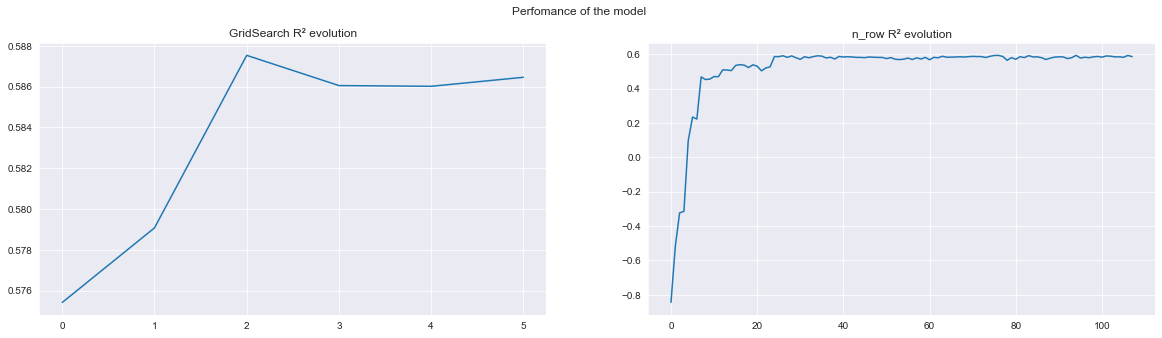

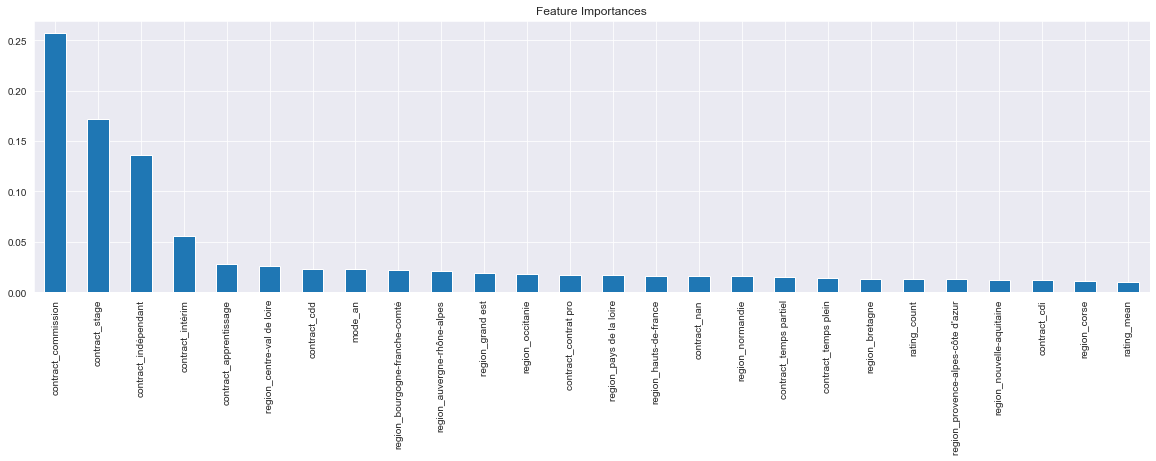

In [24]:
plot_searchs(params, np.array(grid_metrics), np.array(n_row_metrics), feature_importances, f_select + f_region)

In [172]:
r_regions = {}
for region in regions:
    r_regions[region] = {}
    r_regions[region]['params'], r_regions[region]['grid_metrics'] = multi_search(PARAMS, *get_splits(region), f_select)
    r_regions[region]['n_row_metrics'], r_regions[region]['feature_importances'] = n_row_search(r_regions[region]['params'], *get_splits(region), f_select)

40/40 - 100.00


île-de-france


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.7635694126183382
AR2 : 0.7402593547074701
MAE/MEAN : 0.16400670999917485
MSE/MEAN² : 0.05292104415153966
RMSE/MEAN : 0.23004574360665678


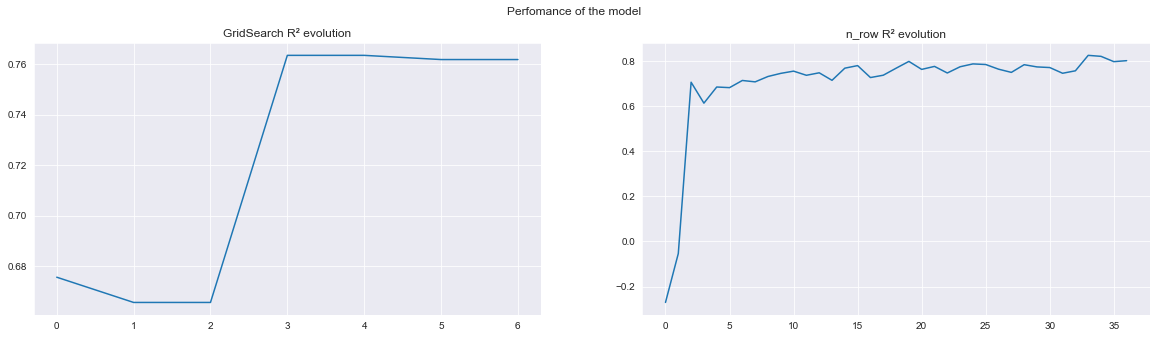

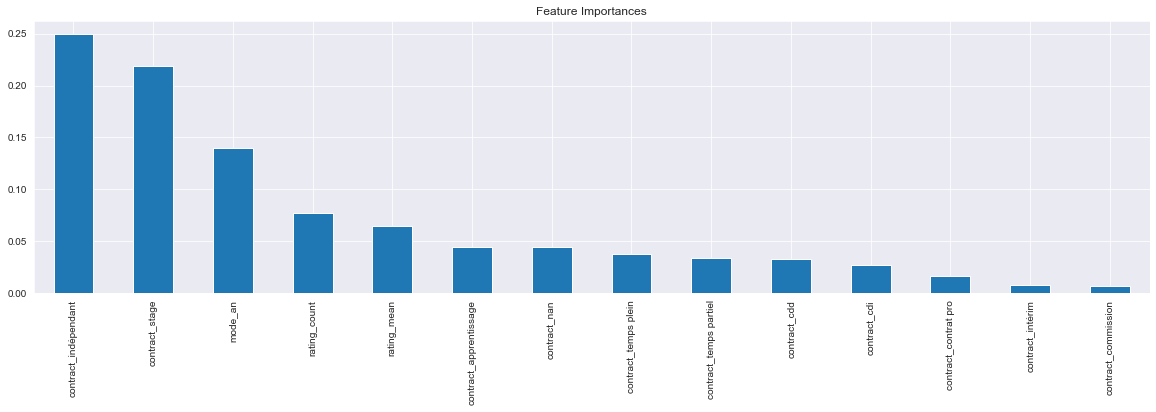

auvergne-rhône-alpes


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.61485157785879
AR2 : 0.47659316991066325
MAE/MEAN : 0.13078243914155094
MSE/MEAN² : 0.053709777839528884
RMSE/MEAN : 0.23175370081085842


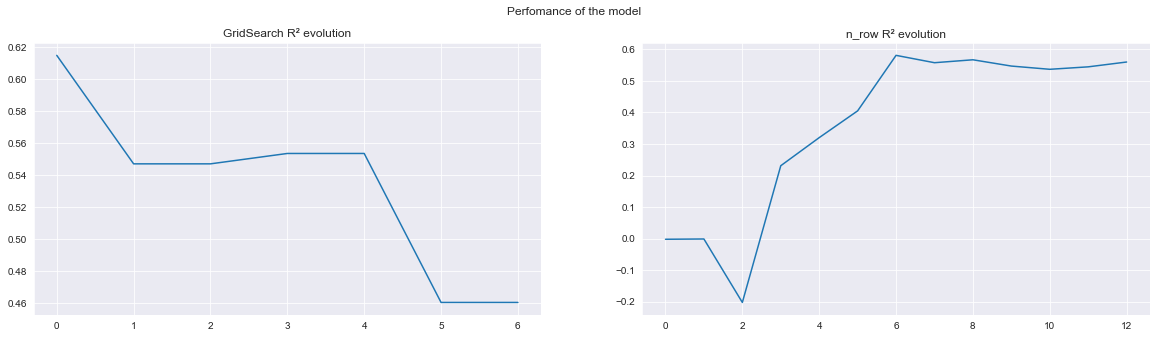

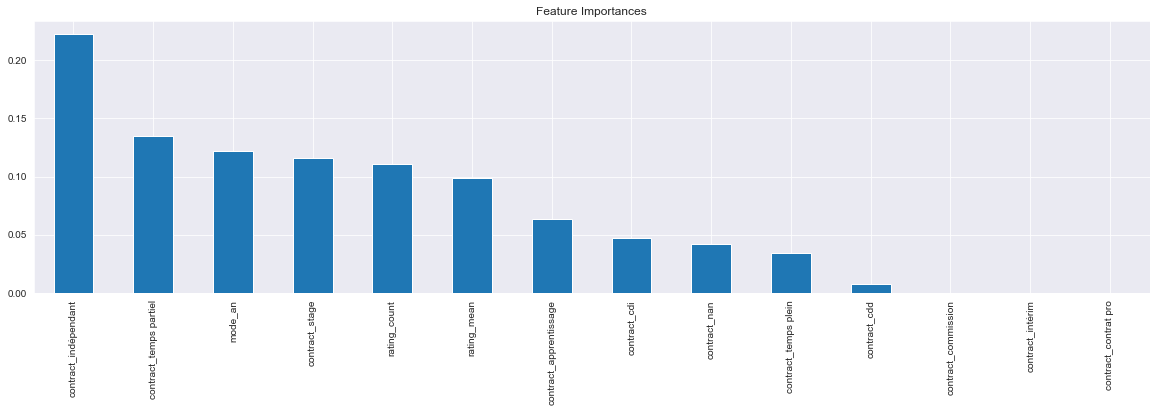

pays de la loire


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.39441641287844
AR2 : 0.08041010844503849
MAE/MEAN : 0.13686611702189716
MSE/MEAN² : 0.032867484296843795
RMSE/MEAN : 0.18129391687765972


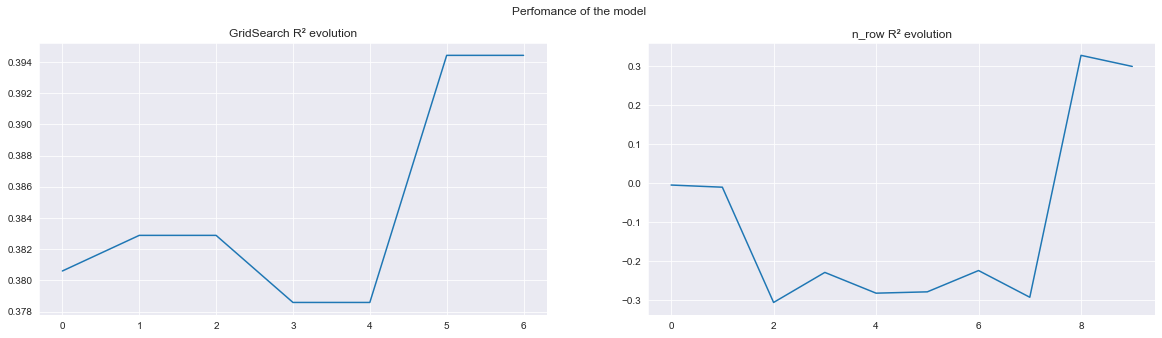

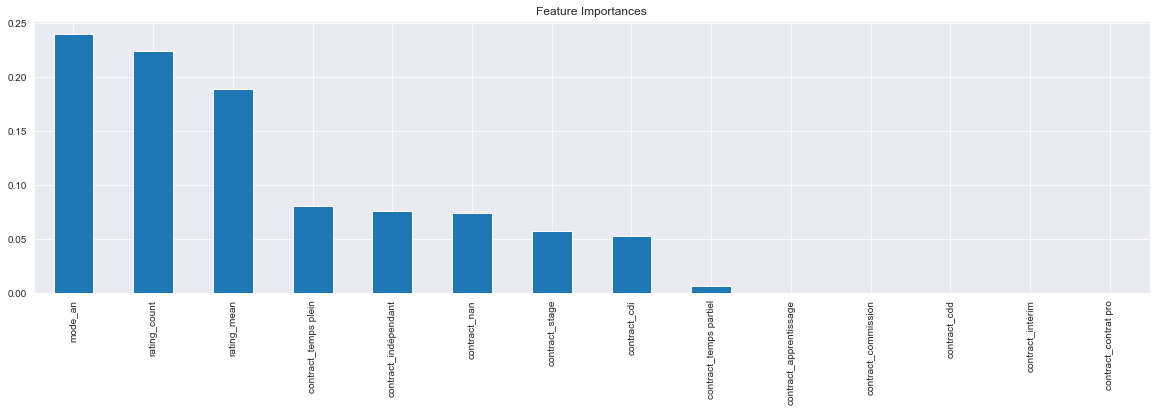

occitanie


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.06458476252488743
AR2 : -0.4592477704611757
MAE/MEAN : 0.18050494939845577
MSE/MEAN² : 0.06467117872596849
RMSE/MEAN : 0.2543052864687804


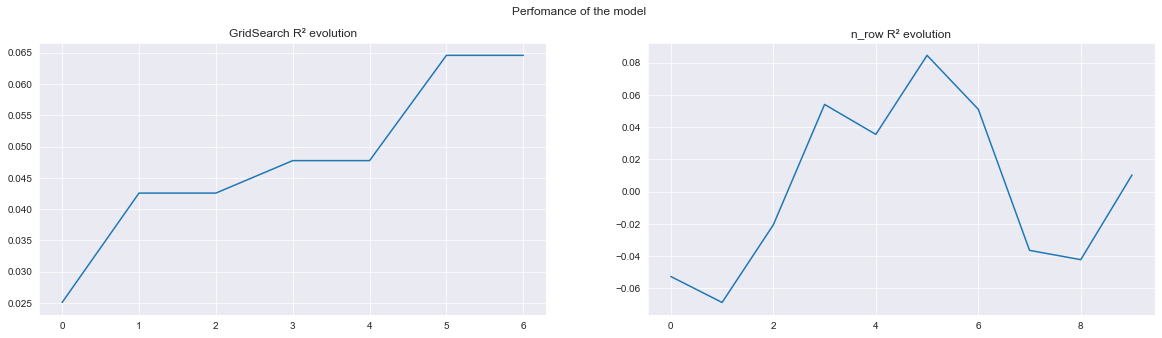

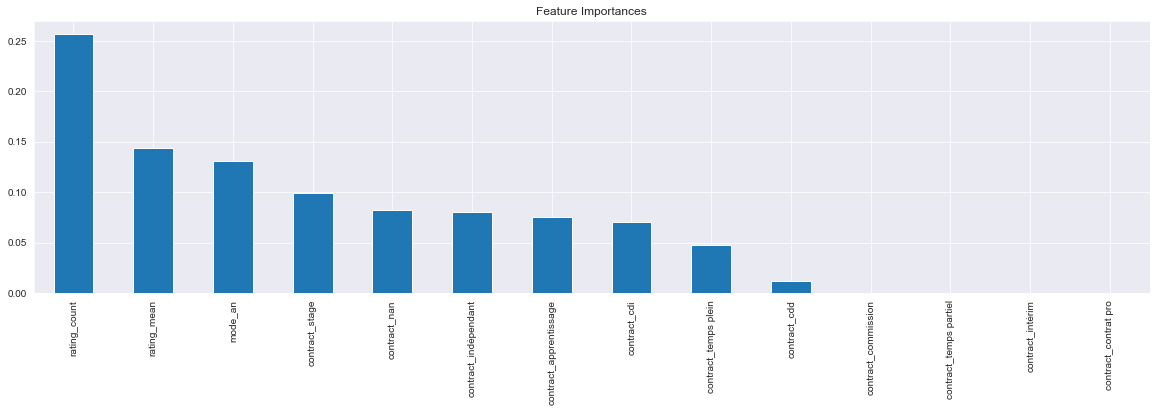

nouvelle-aquitaine


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.7355784612851493
AR2 : 0.5875023996048327
MAE/MEAN : 0.183404658604216
MSE/MEAN² : 0.05524246630353107
RMSE/MEAN : 0.23503715941001982


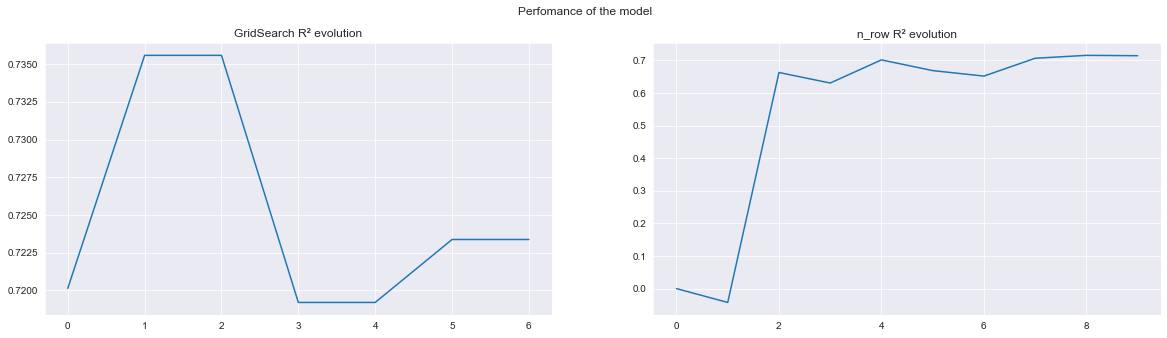

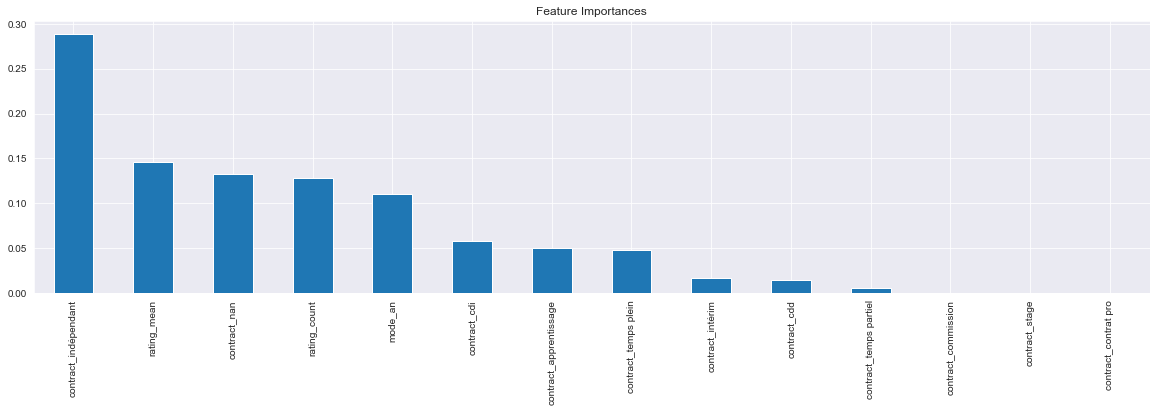

provence-alpes-côte d'azur


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.2967668662713512
AR2 : -0.17205522288108144
MAE/MEAN : 0.1675453603217282
MSE/MEAN² : 0.05135821021256424
RMSE/MEAN : 0.22662349880928992


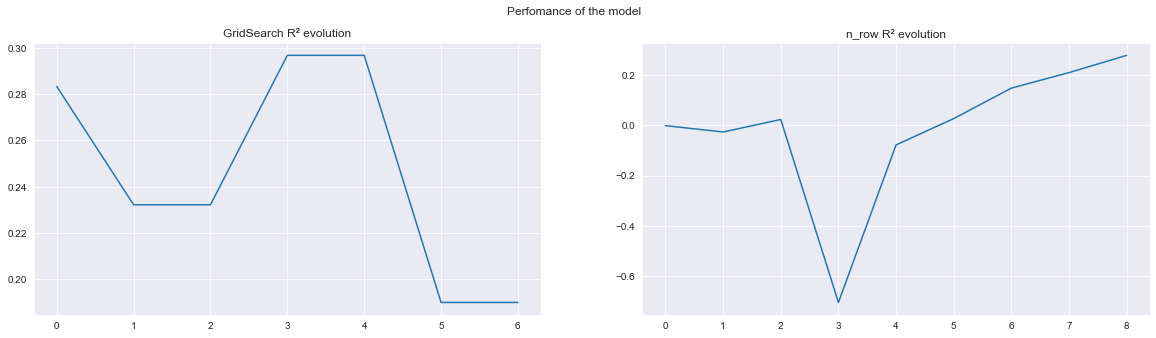

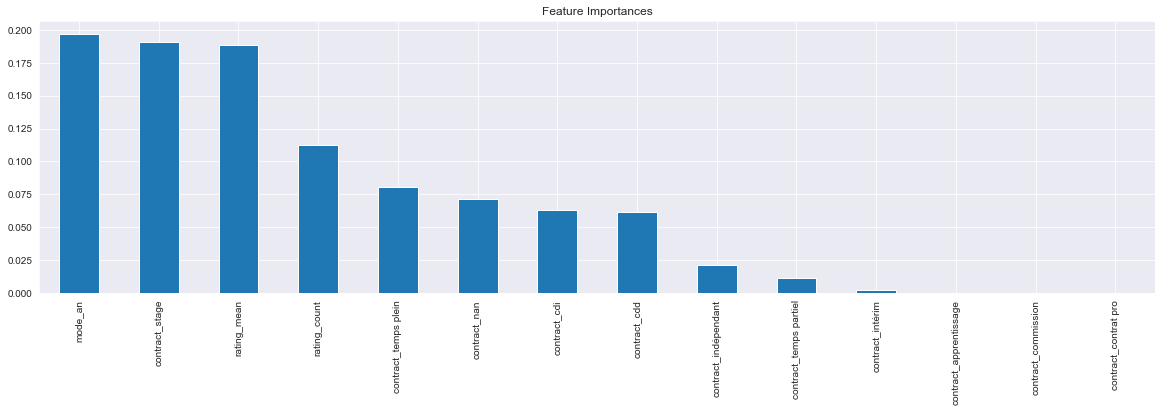

hauts-de-france


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.8476963140169674
AR2 : 0.6953926280339349
MAE/MEAN : 0.0920515537174226
MSE/MEAN² : 0.021241182224891894
RMSE/MEAN : 0.14574354951383575


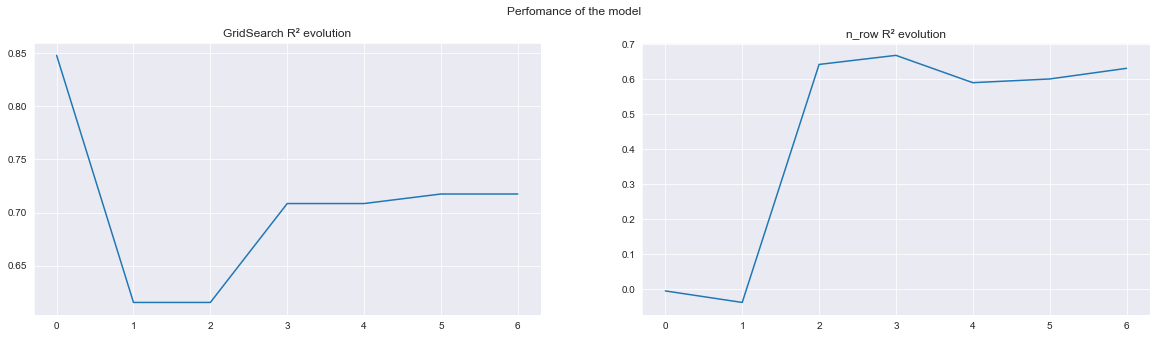

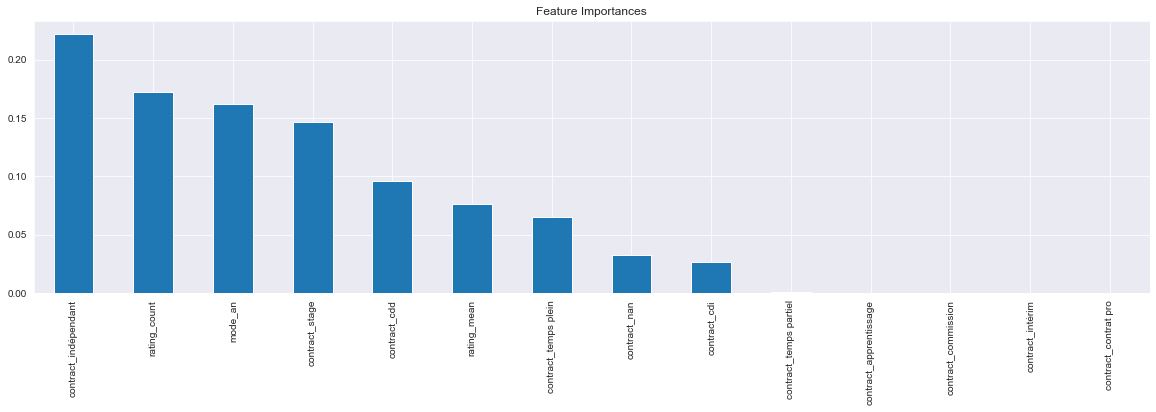

bretagne


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : -0.39529452281715916
AR2 : -4.302119186705204
MAE/MEAN : 0.29980074863688627
MSE/MEAN² : 0.20833777991122324
RMSE/MEAN : 0.4564403355436757


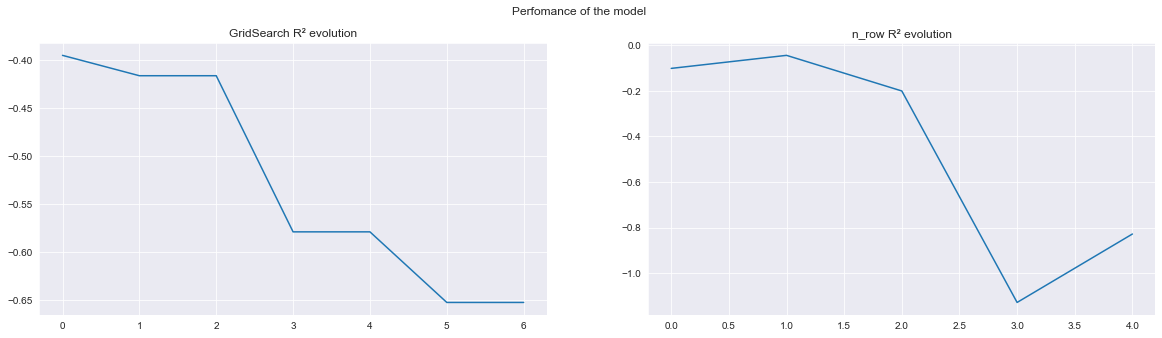

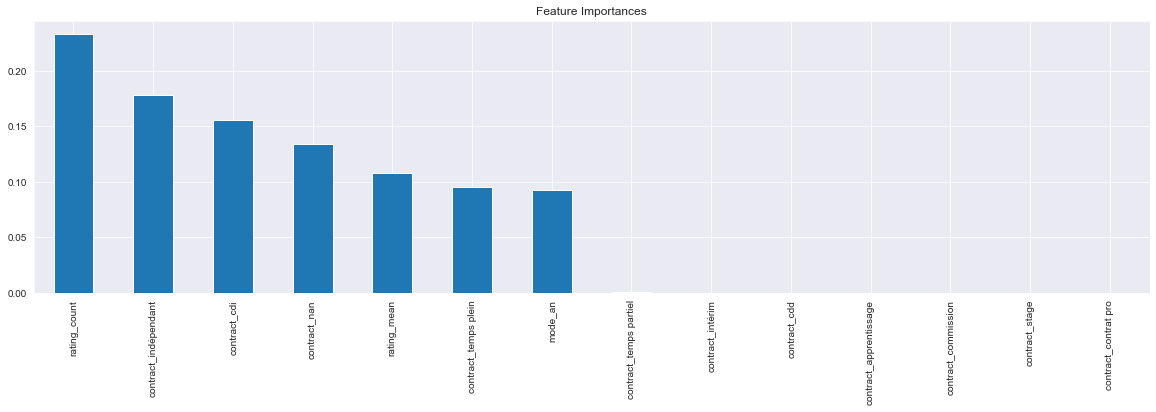

grand est


Model Report

Features : ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'contract_nan', 'mode_an', 'rating_count', 'rating_mean']

Params : {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 8, 'subsample': 1, 'alpha': 0.95, 'loss': 'huber', 'min_impurity_decrease': 0}

R2 : 0.7080506784032958
AR2 : -0.6543794890479904
MAE/MEAN : 0.15255291021333936
MSE/MEAN² : 0.037269864915314074
RMSE/MEAN : 0.19305404661729855


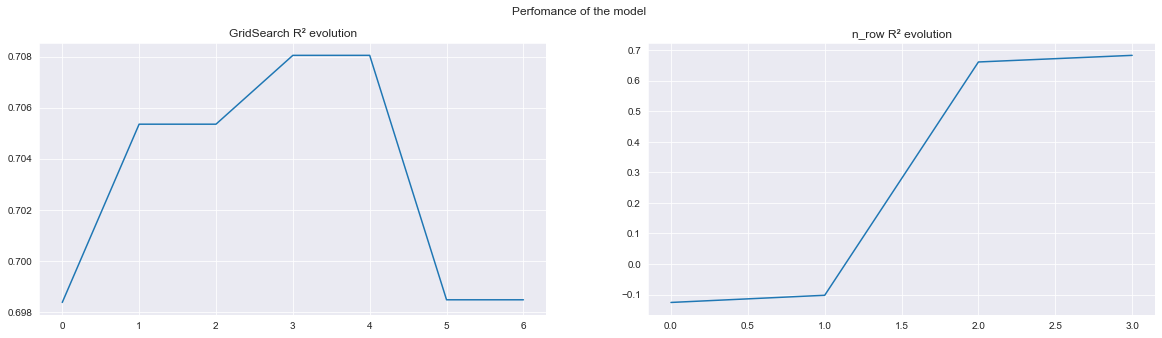

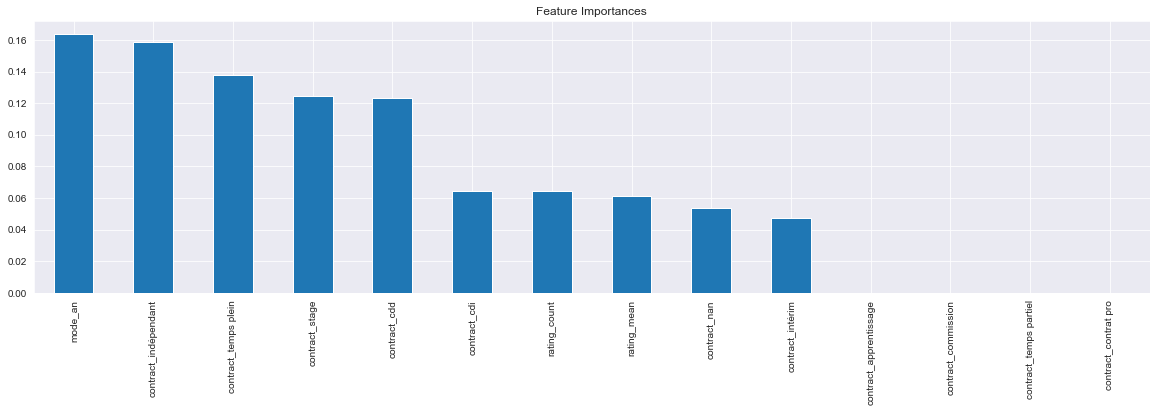

In [182]:
for region in regions:
    print(region)
    print()
    plot_searchs(r_regions[region]['params'], np.array(r_regions[region]['grid_metrics']), np.array(r_regions[region]['n_row_metrics']), r_regions[region]['feature_importances'], f_select)